In [2]:
import pandas as pd
import numpy as np


import re
import openpyxl
import datetime as dt
import sqlite3
import pyarrow as pa
import pyarrow.parquet as pq
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt 

import decimal
import os
import sys

# SRC_DIR = r'/home/pp/program/jupyter/'
sys.path.append(os.path.dirname(r'/home/pp/program/jupyter/'))
from config import *

# Replace 'your_file.parquet' with the path to your Parquet file
df = pd.read_parquet(ZRAZKY_SK_DIR + 'zrazky_sk.parquet'   )

print(df.head())
df.info()

                  Stanica   Typ       Čas merania  Zrážky 1h  Zrážky 3h  \
0         Myjava - Myjava   AHS  01.09.2025 00:00        0.0        0.0   
17                Tisovec  APS2  01.09.2025 00:00        0.0        0.0   
16  Muráň - Hrdzavý potok   AHS  01.09.2025 00:00        0.0        0.0   
15               Štrkovec  APS2  01.09.2025 00:00        0.0        0.0   
14              Skerešovo  APS2  01.09.2025 00:00        0.0        0.2   

    Zrážky 6h  Zrážky 12h  Zrážky 24h              file    Cas_CET  
0         0.0         0.0        15.7  2025-09-01-23-55 2025-09-01  
17        0.0         0.0         0.0  2025-09-01-23-55 2025-09-01  
16        0.0         0.0         0.0  2025-09-01-23-55 2025-09-01  
15        4.7         4.7         4.8  2025-09-01-23-55 2025-09-01  
14        0.9         0.9         0.9  2025-09-01-23-55 2025-09-01  
<class 'pandas.core.frame.DataFrame'>
Index: 587407 entries, 0 to 13
Data columns (total 10 columns):
 #   Column       Non-Null Count 

         Zrážky 1h    Zrážky 3h    Zrážky 6h   Zrážky 12h   Zrážky 24h  \
count  1206.000000  1206.000000  1206.000000  1206.000000  1206.000000   
mean      0.106965     0.320978     0.641791     1.283333     2.556302   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.900000   
max       8.700000    14.900000    22.600000    28.100000    28.100000   
std       0.571219     1.420379     2.493872     4.039779     6.059888   

                             Cas_CET  
count                           1206  
mean   2025-09-02 16:58:57.313432832  
min              2025-08-08 09:00:00  
25%              2025-08-21 03:15:00  
50%              2025-09-02 17:30:00  
75%              2025-09-15 07:45:00  
max              2025-09-27 22:00:00  
std                  

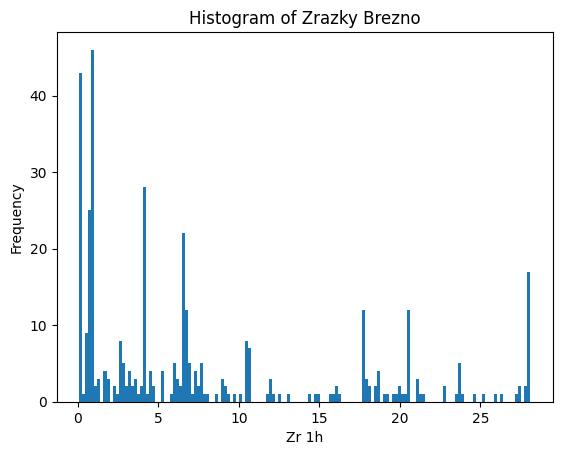

In [3]:
#BREZNO
dfbr = df[df.Stanica == 'Brezno']
print(dfbr.describe())
import matplotlib.pyplot as plt
# plt.hist(dfbr['Zrážky 12h'].__pow__(.1), bins=150)
plt.hist(dfbr.loc[dfbr['Zrážky 24h']>0,['Zrážky 24h']], bins=150)
plt.xlabel('Zr 1h')
plt.ylabel('Frequency')
plt.title('Histogram of Zrazky Brezno')
plt.show()


In [4]:
# sns.swarmplot(x=dfbr['Zrážky 12h']).head(1000)
# plt.show()

In [5]:
result = dfbr.sort_values(by='Cas_CET').copy()
result['rolsum'] = result['Zrážky 1h'].rolling(window=24).sum()
result['diff'] = result['Zrážky 24h'] - result.rolsum



In [12]:
f = pd.read_parquet(ZRAZKY_SK_DIR + 'zrazky_sk.parquet'   )
# make daily averages
# whole dataframe SK - not grouped by station
df_agg = df.copy()
df_agg = df_agg.set_index('Cas_CET').resample('D')['Zrážky 1h'].agg(['sum', 'mean', 'max'])